In [1]:
import tensorflow as tf

# Creating a classification model using Scikit-Learns `make_moons()` function

In [2]:
from sklearn.datasets import make_moons

n_samples = 1000
X,y = make_moons(n_samples,
                 noise = 0.003,
                 random_state=42)

In [3]:
X, X.shape

(array([[ 0.00692129,  0.37045427],
        [ 0.92470298, -0.49459006],
        [ 0.93805576, -0.49091038],
        ...,
        [ 1.6422106 , -0.27003412],
        [-0.92133471,  0.38826183],
        [ 0.80040215,  0.59946424]]), (1000, 2))

In [4]:
y, y.shape

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 

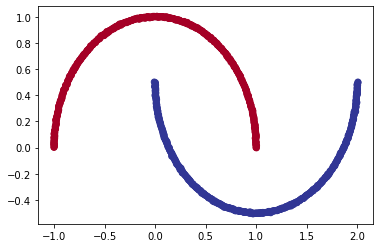

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c =y,cmap = plt.cm.RdYlBu);

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:

tf.random.set_seed(42)

# 1 . Create the model using the sequential api

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation = 'relu'),

    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#2. Compile the model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ['accuracy'])

# 3. Fit the model

model_1.fit(X_train,y_train,epochs = 300)

Epoch 1/300
21/21 [==============================] - 1s 5ms/step - loss: 0.6602 - accuracy: 0.5970
Epoch 2/300
21/21 [==============================] - 0s 4ms/step - loss: 0.5037 - accuracy: 0.7881
Epoch 3/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3857 - accuracy: 0.8418
Epoch 4/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.8493
Epoch 5/300
21/21 [==============================] - 0s 4ms/step - loss: 0.2786 - accuracy: 0.8627
Epoch 6/300
21/21 [==============================] - 0s 3ms/step - loss: 0.2558 - accuracy: 0.8716
Epoch 7/300
21/21 [==============================] - 0s 4ms/step - loss: 0.2407 - accuracy: 0.8836
Epoch 8/300
21/21 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.8881
Epoch 9/300
21/21 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.8985
Epoch 10/300
21/21 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.8970
Epoch 11/

In [37]:
model_1.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000


[0.0013462718343362212, 1.0]

In [38]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.

  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
     

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


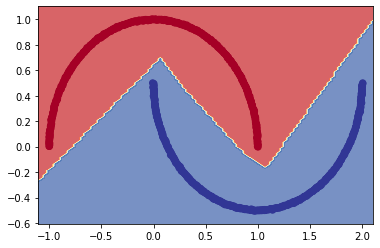

In [39]:
plot_decision_boundary(model_1,X,y)

# Training a model to fit the `fashion MNIST` test set

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets

(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [41]:
# Normalize the data
train_data_norm = train_data/train_data.max()
test_data_norm = test_data / test_data.max()

In [54]:
tf.random.set_seed(42)

# 1 . Create the model using the sequential api

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(15, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#2. Compile the model

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.002),
                metrics = ['accuracy'])

# 3. Fit the model
model_2.fit(train_data_norm,tf.one_hot(train_labels,depth=10),epochs = 30, validation_data = (test_data_norm,tf.one_hot(test_labels,depth=10)))


Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5694 - accuracy: 0.8005 - val_loss: 0.4642 - val_accuracy: 0.8348
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4249 - accuracy: 0.8496 - val_loss: 0.4939 - val_accuracy: 0.8314
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4013 - accuracy: 0.8568 - val_loss: 0.4525 - val_accuracy: 0.8326
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3848 - accuracy: 0.8622 - val_loss: 0.4346 - val_accuracy: 0.8440
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3746 - accuracy: 0.8655 - val_loss: 0.4379 - val_accuracy: 0.8426
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3665 - accuracy: 0.8675 - val_loss: 0.4426 - val_accuracy: 0.8383
Epoch 7/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3605 - accuracy: 0.8702 - val_loss: 0.4178 - val_accuracy:

In [47]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [55]:
y_probs = model_2.predict(test_data_norm)

313/313 [==============================] - 0s 1ms/step


In [56]:
y_preds = y_probs.argmax(axis=1)

In [57]:
class_names = ["T-shirt/top", "Trouser", "Pullover","Dress","Coat", "Sandal", "Shirt","Sneaker", "Bag", "Ankle boot"]

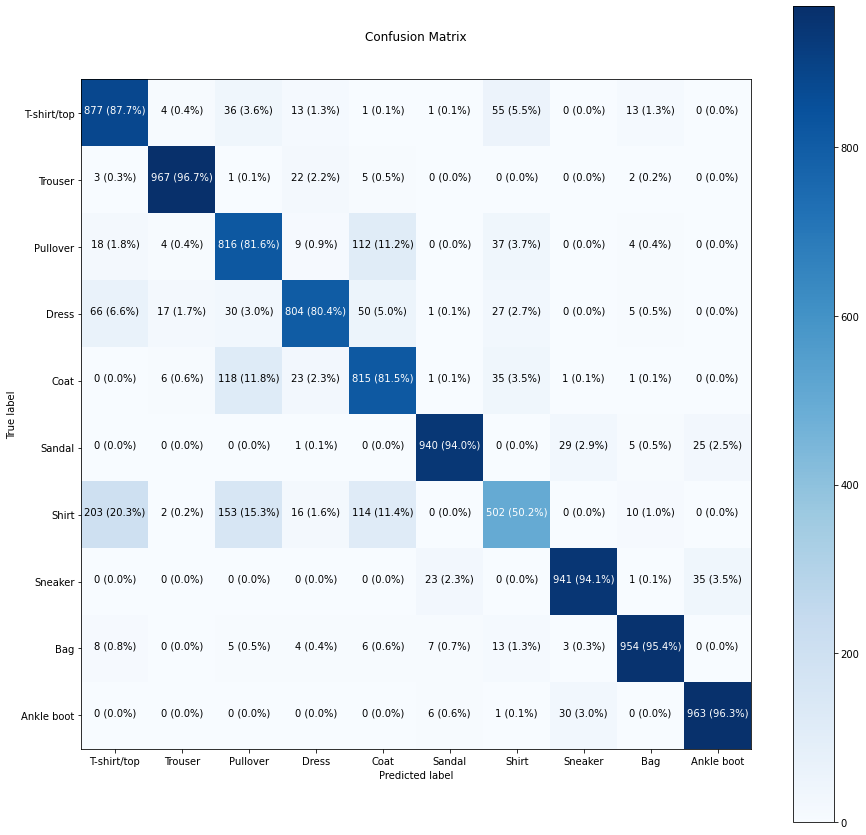

In [58]:
make_confusion_matrix(y_true = test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)